<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span></li><li><span><a href="#Read-in-Feather" data-toc-modified-id="Read-in-Feather-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read-in Feather</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Check-Dates-in-DateRange" data-toc-modified-id="Check-Dates-in-DateRange-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check Dates in DateRange</a></span></li><li><span><a href="#Number-of-Minutes-Values-exceeding-threshold-of-19.5hrs" data-toc-modified-id="Number-of-Minutes-Values-exceeding-threshold-of-19.5hrs-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Number of Minutes Values exceeding threshold of 19.5hrs</a></span></li><li><span><a href="#Distance-Upper-End" data-toc-modified-id="Distance-Upper-End-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Distance Upper-End</a></span></li></ul></li></ul></div>

# IMPORTS

In [1]:
# set the display aspect ratio

from IPython.core.display import display, HTML
display(HTML('<style>.container {width:80% !important;}</style>'))

In [2]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as papr

In [3]:
# Display plots in the notebook

%matplotlib inline

In [4]:
# load custom function for assessing dataframes succinctly

def assess_df(df):
  
    feature_types = {df[df.columns[x]].dtypes.name for x in range(len(df.columns))}
    
  	# print datatypes
  
    print("Datatypes:\n")
    print(df.dtypes)
    print('\n\n')
    
    # print number rows and cols
    print('*' * 50)
    print('ROWS, COLUMNS, NULLS\n')
    print(df.shape[0], "rows in the dataframe.")
    print(df.shape[1], "columns in the dataframe.\n")
    print(df.isnull().sum().sum(), "null values in the dataframe.")
    
    # check duplicate rows & col; print if present
    
    duplicate_rows = df.duplicated(keep=False).sum()
    duplicate_cols = df.index.T.duplicated(keep=False).sum()
    
    print(duplicate_rows, "duplicate rows")
    print(duplicate_cols, "duplicate columns")
    
    if duplicate_rows > 0 or duplicate_cols > 0:
      print(df.loc[df.duplicated()])
	
    print('\n')
    
    # check for constant columns
    
    numeric_cols = list(df.select_dtypes(include=[np.number]).columns.values)
    categorical_cols = list(df.select_dtypes('category').columns.values)
    
    standard_diffs = [df.describe().loc['std', x] for x in numeric_cols]
    
    constant_categorical_column=False
    if 'category' in feature_types:
        for column in categorical_cols:
            if df[column].describe().index.unique == 1:
                constant_categorical_column = True
            
            
    if 0 in standard_diffs:
        print("Constant numeric columns: TRUE")
    else:
        print("Constant numeric columns: FALSE")
  
    if 'category' in feature_types:    
        if constant_categorical_column == True:
            print("Constant categorical columns: TRUE")
        else:
            print("Constant categorical columns: FALSE")

            
    
    print('\n\n')

    
    # feature stats
    print('*' * 50)
    print('DESCRIPTION\n')
    print(df.describe().T)
    print('\n\n')
    print('*' * 50)

    
    # feature stats: categorical
    
    if 'category' in feature_types:
        print('CATEGORICAL DESCRIPTION\n')
        print('\n')
        print(df.select_dtypes(['category']).describe().T)
        print('\n\n')
        print('*' * 50)
    
    # print feature cardinalities
    
    print("FEATURE CARDINALITIES\n")
    column_names = list(df.columns.values)

    print('{0:45}  {1}'.format("Feature", "Distinct Values"))
    print('{0:45}  {1}'.format("-------", "--------------- \n"))

    for c in column_names:
        print('{0:45}  {1}'.format(c, str(len(df[c].unique()))))
    
    print('\n')
    print('*' * 50)
    print('MEMORY\n')
    
    
    print(df.info(memory_usage='deep'))
    print('\n')
    print(df.memory_usage(deep=True))
    print('\n')
    print('*' * 50)
    print('HEAD\n')
    print(df.head(10))
    print('\n')
    print('*' * 50)
    print('TAIL\n')
    print(df.tail(10))

# Read-in Feather

In [5]:
df = pd.read_feather('/tmp/ssh_mount/rt_vehicles/020719_vehicles.feather')

In [6]:
df.head()

,DAYOFSERVICE,VEHICLEID,DISTANCE,MINUTES
0,2018-11-23,3303848,286166,58849
1,2018-11-23,3303847,259545,56828
2,2018-02-28,2868329,103096,40967
3,2018-02-28,2868330,147277,43599
4,2018-02-28,2868331,224682,40447


In [7]:
assess_df(df)

Datatypes:

DAYOFSERVICE    datetime64[ns]
VEHICLEID             category
DISTANCE                 int64
MINUTES                  int64
dtype: object



**************************************************
ROWS, COLUMNS, NULLS

272622 rows in the dataframe.
4 columns in the dataframe.

0 null values in the dataframe.
0 duplicate rows
0 duplicate columns


Constant numeric columns: FALSE
Constant categorical columns: FALSE



**************************************************
DESCRIPTION

             count           mean           std      min       25%       50%  \
DISTANCE  272622.0  177486.328466  71334.432383      0.0  126765.0  177420.0   
MINUTES   272622.0   45597.643220  14881.389868 -70145.0   39380.0   46994.5   

                75%       max  
DISTANCE  227126.25  473864.0  
MINUTES    57911.00   76651.0  



**************************************************
CATEGORICAL DESCRIPTION



            count  unique      top  freq
VEHICLEID  272622    1152  2693284   342



******

# Data Exploration

## Check Dates in DateRange

In [8]:
# earliest timestamp

start_date = df.DAYOFSERVICE.min()
start_date

Timestamp('2018-01-01 00:00:00')

In [9]:
# latest timestamp

end_date = df.DAYOFSERVICE.max()
end_date

Timestamp('2018-12-31 00:00:00')

In [10]:
# define the range of dates

year = pd.date_range(start_date, end_date)

In [11]:
# check which dates from the dataset do 
# not appear in the range

year.difference(df.DAYOFSERVICE.values)

DatetimeIndex(['2018-03-01', '2018-03-02', '2018-12-09', '2018-12-10',
               '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

## Number of Minutes Values exceeding threshold of 19.5hrs

In [13]:
df.loc[df.MINUTES > 70020].shape[0]

270

In [15]:
(df.loc[df.MINUTES > 70020].shape[0] / len(df)) * 100

0.09903822875629995

## Distance Upper-End

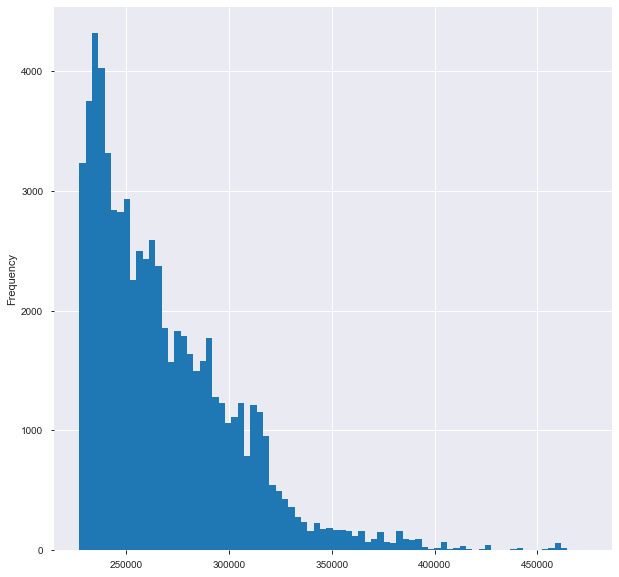

In [21]:
# plot distance figures above the 75th percentile

df.loc[df.DISTANCE > 227126, 'DISTANCE'].plot(kind='hist', bins=80, figsize=(10,10))

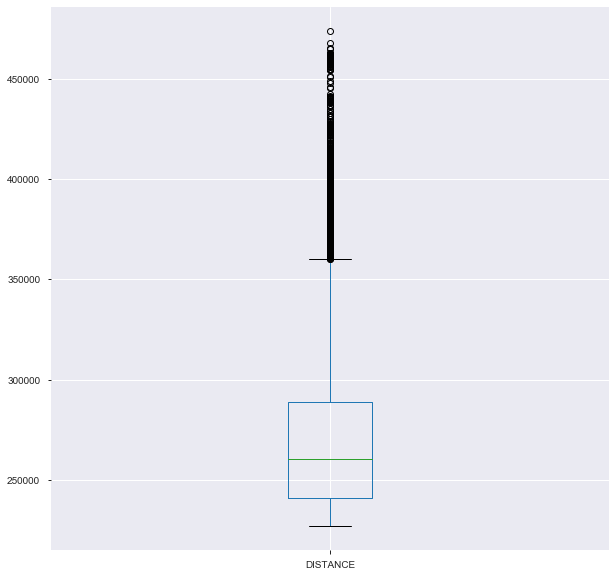

In [22]:
df.loc[df.DISTANCE > 227126, 'DISTANCE'].plot(kind='box', figsize=(10,10))

In [23]:
df.loc[df.DISTANCE > 350000].shape[0]

2141

In [24]:
(df.loc[df.DISTANCE > 350000].shape[0] / len(df)) * 100

0.7853364732119932